In [10]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [11]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [12]:
#print(X_train[0])
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])

<Figure size 640x480 with 1 Axes>

5


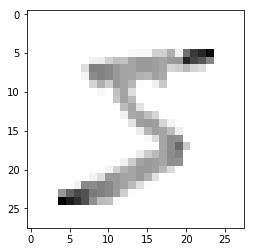

5


In [13]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
#print(X_train[0])
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])

In [14]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2616 - acc: 0.9238
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1054 - acc: 0.9673
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0732 - acc: 0.9769
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0533 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0406 - acc: 0.9865


In [16]:
val_loss,val_acc=model.evaluate(X_test,y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0908 - acc: 0.9734
0.09080100098112598
0.9734


In [17]:
model.save('epic_num_reader.model')

In [18]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

W0630 19:44:51.595589 139890636490560 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [19]:
predictions=new_model.predict(X_test)
print(predictions)

[[6.0776967e-10 3.0331215e-09 6.1927302e-08 ... 9.9998534e-01
  7.8029200e-10 1.0676456e-06]
 [3.5056955e-10 6.6194619e-04 9.9861193e-01 ... 1.5838924e-07
  1.5593370e-08 7.6398374e-11]
 [1.2579762e-08 9.9996841e-01 2.7849293e-07 ... 5.8125643e-06
  6.0048296e-06 1.7322935e-07]
 ...
 [1.9345368e-09 5.0713111e-06 8.4784295e-09 ... 3.3434364e-06
  6.0469446e-08 6.2349818e-06]
 [9.0543814e-08 1.1923663e-07 6.9691133e-08 ... 3.2368551e-08
  4.9414649e-04 1.1932699e-10]
 [3.1852887e-10 3.4283948e-10 1.6123426e-10 ... 3.3477767e-13
  1.5479454e-09 1.9439162e-12]]


In [20]:
import numpy as np
print(np.argmax(predictions[0]))

7


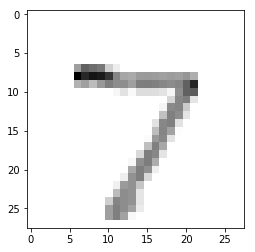

In [22]:
plt.imshow(X_test[0],cmap=plt.cm.binary)
plt.show()